<a href="https://colab.research.google.com/github/nishay324/Mobile-Price-Classification/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context 
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**Description of variables in the above file**                
1. **battery_power**: Total energy a battery can store in one time measured in mAh  
2. **blue**: Has Bluetooth or not
3. **clock_speed**: the speed at which microprocessor executes instructions
4. **dual_sim**: Has dual sim support or not
5. **fc**: Front Camera megapixels
6. **four_g**: Has 4G or not
7. **int_memory**: Internal Memory in Gigabytes
8. **m_dep**: Mobile Depth in cm
9. **mobile_wt**: Weight of mobile phone
10. **n_cores**: Number of cores of the processor
11. **pc**: Primary Camera megapixels
12. **px_height**: Pixel Resolution Height
14. **px_width**: Pixel Resolution Width
15. **ram**: Random Access Memory in MegaBytes
16. **sc_h**: Screen Height of mobile in cm
17. **sc_w**: Screen Width of mobile in cm
18. **talk_time**: the longest time that a single battery charge will last when you are
19. **three_g**: Has 3G or not
20. **touch_screen**: Has touch screen or not
21. **wifi**: Has wifi or not
22. **price_range**: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

#Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns



#Reading data

In [2]:
train= pd.read_csv('train.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The dataset contains 2000 rows and 21 columns.      
There are no null values.

In [5]:
train.apply(lambda x: len(x.unique()))

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

#Data Analysis

Target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


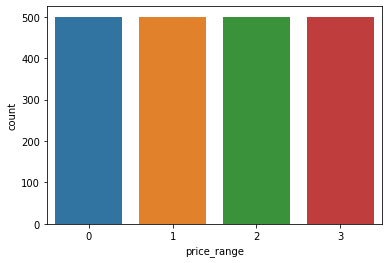

In [6]:
sns.countplot(train['price_range'])

#Feature Selection

**Univariate Selection**

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
X= train.iloc[ : , 0:20]

In [9]:
Y=train.iloc[ : , -1]

In [10]:
bestfeature= SelectKBest(score_func= chi2, k=10)

In [11]:
fit = bestfeature.fit(X,Y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [13]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [14]:
# checking null values
x= train[['battery_power','ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]


In [15]:
x.isnull().sum()

battery_power    0
ram              0
px_height        0
battery_power    0
px_width         0
mobile_wt        0
int_memory       0
sc_w             0
talk_time        0
fc               0
sc_h             0
dtype: int64

Data Visualization

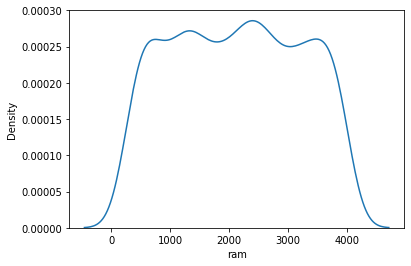

In [16]:
sns.kdeplot(train['ram']);

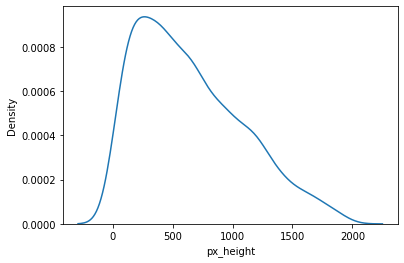

In [17]:
sns.kdeplot(train['px_height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

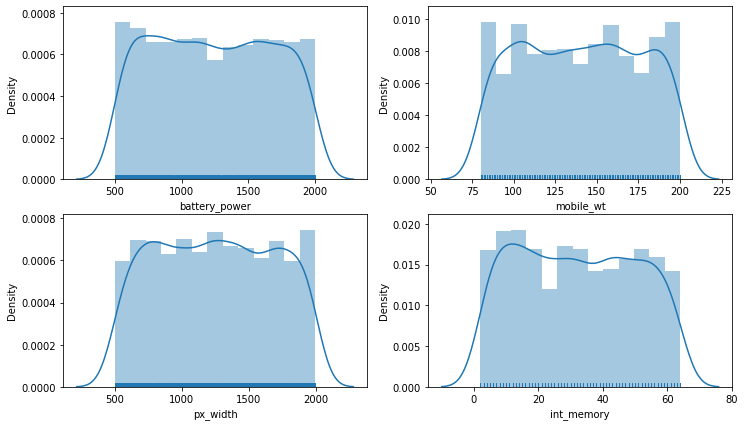

In [18]:
plt.figure(1, figsize=(12,7))

plt.subplot(221)
sns.distplot(train['battery_power'] , kde=True , rug = True)

plt.subplot(222)
sns.distplot(train['mobile_wt'], kde= True, rug= True)

plt.subplot(223)
sns.distplot(train['px_width'], kde= True , rug= True)

plt.subplot(224)
sns.distplot(train['int_memory'], kde= True , rug= True)
plt.show()

#Splitting the data into the train and test

In [19]:
from sklearn.model_selection import train_test_split



In [22]:
#input
X = train[['battery_power','ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]
y= train['price_range']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1400, 11) (1400,)
(600, 11) (600,)


# Classification Models

**Logistics Regression**

In [24]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       159
           1       0.52      0.51      0.52       146
           2       0.47      0.44      0.45       147
           3       0.66      0.76      0.70       148

    accuracy                           0.63       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.63      0.63      0.62       600

0.6266666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
logreg.predict_proba(X_train)

array([[6.40977491e-02, 7.40390856e-01, 1.88861954e-01, 6.64944107e-03],
       [4.50738636e-07, 2.93614299e-03, 1.38433483e-01, 8.58629923e-01],
       [4.97774667e-01, 4.88867960e-01, 1.30872649e-02, 2.70107964e-04],
       ...,
       [9.74023641e-01, 2.57216483e-02, 2.54203770e-04, 5.07073237e-07],
       [3.76014065e-04, 8.91174147e-02, 4.11462857e-01, 4.99043714e-01],
       [8.33130328e-03, 3.75538594e-01, 5.33438922e-01, 8.26911808e-02]])


**Logistic Regresssion after Standardization**

In [30]:
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [32]:

scaler =StandardScaler()
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.fit_transform(X_test)

In [33]:
logreg = LogisticRegression()
logreg.fit(s_X_train, y_train)

y_pred = logreg.predict(s_X_test)
print(classification_report(y_test,y_pred))
l = accuracy_score(y_test,y_pred)
print(l)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       159
           1       0.92      0.90      0.91       146
           2       0.91      0.93      0.92       147
           3       0.96      0.99      0.98       148

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.94      0.94       600

0.945


**Naive Bayes**

In [34]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(s_X_train, y_train)
y_pred = model_naive.predict(s_X_test)
print(classification_report(y_test,y_pred))
n = accuracy_score(y_test,y_pred)
print(n)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       159
           1       0.69      0.69      0.69       146
           2       0.69      0.72      0.71       147
           3       0.93      0.94      0.94       148

    accuracy                           0.82       600
   macro avg       0.82      0.81      0.82       600
weighted avg       0.82      0.82      0.82       600

0.8166666666666667


**K-Nearest Neighbour**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(s_X_train, y_train)
y_pred = knn.predict(s_X_test)
print(classification_report(y_test,y_pred))
k = accuracy_score(y_test,y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       159
           1       0.52      0.61      0.56       146
           2       0.56      0.56      0.56       147
           3       0.80      0.70      0.74       148

    accuracy                           0.67       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.68      0.67      0.67       600

0.6683333333333333


**Decision Tree**

In [36]:

from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
d_model.fit(s_X_train,y_train)
y_pred = d_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
d = accuracy_score(y_test,y_pred)
print(d)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       159
           1       0.60      0.80      0.69       146
           2       0.67      0.62      0.65       147
           3       0.86      0.84      0.85       148

    accuracy                           0.75       600
   macro avg       0.77      0.75      0.75       600
weighted avg       0.77      0.75      0.76       600

0.7516666666666667


**Random Forrest**

In [38]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(criterion='gini', n_estimators=150 ,max_depth=3, max_features = None, oob_score=True)
randomforest_model.fit(s_X_train,y_train) 
print("The out of bag score is", randomforest_model.oob_score_)
y_pred = randomforest_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
r = accuracy_score(y_test,y_pred)
print(r)

The out of bag score is 0.7657142857142857
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       159
           1       0.62      0.80      0.70       146
           2       0.67      0.63      0.65       147
           3       0.87      0.84      0.85       148

    accuracy                           0.76       600
   macro avg       0.77      0.76      0.76       600
weighted avg       0.78      0.76      0.76       600

0.76
